# Data Analytics on New York City Current Job Posting data

## Dataset Source: Provided as embedded file within the word document
This dataset is maintained using Socrata's API and Kaggle's API. Socrata has assisted countless organizations with hosting their open data and has been an integral part of the process of bringing more data to the public.

## Business Problem Understanding
> ### Focus on applying data analytics concepts and share findings on following aspects:
- What are the highest paid Skills in the US market?
- What are the job categories, which involve above mentioned niche skills?
- Applying clustering concepts, depict visually what are the different salary ranges based on job category and years of experience.
> ### Tasks:
1. Step 1: Data Preparation
    1. Obtain a structure for the data using Python Programming Language – 1 marks
    2. Create the required schema to read the data into the required format into rows and columns – 1 marks
    3. Schema must be normalized, field types must be appropriate as per fields available. Proper data model e.g. – 8 marks
    4. Select the appropriate features (columns) and parse the same, cleanup if required and convert to required categories<br>
2. Step 2: Identification of Variables
    1. Identify the required variables
3.	Step 3: Variable Selection
    1. Reason for the selection of the variable above
4.	Step 4: Feature Engineering
    1. What text parsing applied on for the required fields
5.	Step 5: Missing value or data
    1. Missing values exist in following columns
    2. Special characters in some columns need to be handled
6.	Step 6: Analysis
    1. What are the highest paid Skills in the US market? <br>
        i.	Python code which queries on Top 10 Skills with Salary ranges<br>
        ii.	If student have depicted using graphs, it would be good<br>
     2.	What are the job categories, which involve above mentioned niche skills?
        i.	Python code which queries and depicts Top 10 Job categories with above query result-set skills
        ii.	Graph to be plotted
    3.	Applying clustering concepts, please depict visually what are the different salary ranges based on job category and years of experience. – 10 marks
        i.	Graphically plot all 3 dependent variables – i.e.  job category, salary and years of experience 
        ii.	Graph must be readable and understandable 
        iii.	Graph type chosen
        iv.	Graph colour used
        v.	Legend and labels used

## 1. Load the libraries

In [56]:
# We will need following libraries to start with and shall load the libraries required as we go along
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud ,STOPWORDS, ImageColorGenerator

## 2. Read the input data into a pandas dataframe
> Copy the file 'jobs.csv' which is embedded within the assignment document to the working folder of Jupyter. 
Load the data from the file to a pandas dataframe

In [57]:
#Reading the dataset by applying the metadata explicitly
from io import StringIO

file=open('jobs.csv', encoding="mbcs")
data=file.read()

df = pd.read_csv(StringIO(data), usecols=lambda x: x in ['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date'], header=0)

## 3. Exploratory Data Analysis

In [58]:
df.shape  # rows, columns of original dataset

(3020, 28)

In [59]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-11-26T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-11-26T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â‚¬â„¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-11-26T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-11-26T00:00:00.000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
Job ID                           3020 non-null int64
Agency                           3020 non-null object
Posting Type                     3020 non-null object
# Of Positions                   3020 non-null int64
Business Title                   3020 non-null object
Civil Service Title              3020 non-null object
Title Code No                    3020 non-null object
Level                            3020 non-null object
Job Category                     3018 non-null object
Full-Time/Part-Time indicator    2811 non-null object
Salary Range From                3020 non-null float64
Salary Range To                  3020 non-null float64
Salary Frequency                 3020 non-null object
Work Location                    3020 non-null object
Division/Work Unit               3020 non-null object
Job Description                  3020 non-null object
Minimum Qual Requirements    

<div class="alert alert-block alert-info">
There are mix of int, float and object columns, but the majority of them are object coluumns. We will have to convert the features to their appropriate datatypes
<div>

In [61]:
# Define a function to display the missing value % against the feature
def missing_values_table(df):
   
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_columns = mis_val_table_columns[
        mis_val_table_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(2)  # round(2), keep 2 digits
    
    # Print some summary information
    print("Dataset has {} columns.".format(df.shape[1]) + '\n' + 
    "There are {} columns that have missing values.".format(mis_val_table_columns.shape[0]))
    
    # Return the dataframe with missing information
    return mis_val_table_columns

In [62]:
missing_values_table(df)

Dataset has 28 columns.
There are 14 columns that have missing values.


,Missing Values,% of Total Values
Recruitment Contact,3020,100.00
Hours/Shift,2097,69.44
Post Until,2048,67.81
Work Location 1,1598,52.91
Additional Information,1180,39.07
Preferred Skills,439,14.54
Full-Time/Part-Time indicator,209,6.92
Minimum Qual Requirements,16,0.53
Job Category,2,0.07
Residency Requirement,2,0.07


## 4. Data preprocessing

### 4.1 Data cleaning 

In [63]:
#Renaming columns to standardized column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_').str.replace('/', '_')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 28 columns):
job_id                           3020 non-null int64
agency                           3020 non-null object
posting_type                     3020 non-null object
#_of_positions                   3020 non-null int64
business_title                   3020 non-null object
civil_service_title              3020 non-null object
title_code_no                    3020 non-null object
level                            3020 non-null object
job_category                     3018 non-null object
full_time_part_time_indicator    2811 non-null object
salary_range_from                3020 non-null float64
salary_range_to                  3020 non-null float64
salary_frequency                 3020 non-null object
work_location                    3020 non-null object
division_work_unit               3020 non-null object
job_description                  3020 non-null object
minimum_qual_requirements    

In [65]:
# Applying the appropriate data type to the features
# Convert objects to category data type
# df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
# df.info()

In [66]:
#Removing non-ascii (special) characters from the cateogirical columns in the dataframe

for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Series(df[col]).str.replace('[^A-Za-z&,\s]+', '').str.strip()


### 4.2 Feature Engineering

In [67]:
# Required features for the given analytics tasks are 
# business_title, civil_service_title, job_category, salary_range_from, salary_range_to, salary_frequency, division_work_unit, job_description, minimum_qual_requirements, preferred_skills, additional_information

# Drop the columns that are not required for analytics (for the given tasks in the assignment)

df.drop(['job_id', 'agency', 'posting_type', '#_of_positions', 'title_code_no', 'level', 'full_time_part_time_indicator', 'work_location', 'to_apply', 'hours_shift', 'work_location_1', 'recruitment_contact', 'residency_requirement', 'posting_date', 'post_until', 'posting_updated', 'process_date'
], axis=1, inplace=True)
# df.columns = ['id', 'agency', 'posting_type', 'number_of_positions', 'business_title', 'civil_service_title', 'title_code_number', 'level', 'job_category', 'full-time/part-time', 'salary_range_low', 'salary_range_high', 'salary_frequency', 'work_location', 'work_unit', 'job_description', 'minimum_requirements', 'preferred_skills', 'additional_info', 'to_apply', 'shift', 'work_location_1', 'residency_requirement', 'posting_date', 'posting_updated', 'process_date' ]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 11 columns):
business_title               3020 non-null object
civil_service_title          3020 non-null object
job_category                 3018 non-null object
salary_range_from            3020 non-null float64
salary_range_to              3020 non-null float64
salary_frequency             3020 non-null object
division_work_unit           3020 non-null object
job_description              3020 non-null object
minimum_qual_requirements    3004 non-null object
preferred_skills             2581 non-null object
additional_information       1840 non-null object
dtypes: float64(2), object(9)
memory usage: 259.6+ KB


In [68]:
missing_values_table(df)

Dataset has 11 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
additional_information,1180,39.07
preferred_skills,439,14.54
minimum_qual_requirements,16,0.53
job_category,2,0.07


In [69]:
# Since there are two job categories with null values, let us drop those rows
df = df.dropna(axis=0, subset=['job_category'])
missing_values_table(df)

Dataset has 11 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
additional_information,1179,39.07
preferred_skills,438,14.51
minimum_qual_requirements,16,0.53


In [70]:
#Calculating Average Salary for each type of salary range
import warnings
warnings.filterwarnings('ignore')

df_annual = df[df.salary_frequency == 'Annual']
df_hourly = df[df.salary_frequency == 'Hourly']
df_daily = df[df.salary_frequency == 'Daily']


df_annual['average_salary']=(df_annual['salary_range_from'] + df_annual['salary_range_to'])/2
df_hourly['average_salary']=((df_hourly['salary_range_from'] + df_hourly['salary_range_to'])*176*12)/2
df_daily['average_salary']=((df_daily['salary_range_from'] + df_daily['salary_range_to'])*365)/2

df=pd.concat([df_annual, df_hourly, df_daily])

## 5. Analytics

In [71]:
# functions for parsing the text in the columns 'job_category', 'preferred_skills', etc.,
def parse_categories(x):
    l = x.replace('&', ',').split(',')
    l = [x.strip().rstrip(',') for x in l]
    key_skills.extend(l)

def parse_keywords(x, l):
    x = x.lower()
    tokens = nltk.word_tokenize(x)
    stop_words = set(stopwords.words('english'))
    token_l = [w for w in tokens if not w in stop_words and w.isalpha()]
    l.extend(token_l)
    
def preferred_skills(x):
    kwl = []
    df[df.job_category==x].preferred_skills.dropna().apply(parse_keywords, l=kwl)
    kwl = pd.Series(kwl)
    return kwl.value_counts()[:20]

### 5.1 Popular skills

In [72]:
# Lets list the different job categories in the order of demand
df.job_category.value_counts()

Engineering, Architecture, & Planning                                                                                                                        545
Technology, Data & Innovation                                                                                                                                283
Legal Affairs                                                                                                                                                239
Building Operations & Maintenance                                                                                                                            209
Public Safety, Inspections, & Enforcement                                                                                                                    181
Finance, Accounting, & Procurement                                                                                                                           164
Constituent Services & Community P

There are many jobs that expect a combination of skills. Lets identify the individual skills from the skill combinations

In [73]:
key_skills = []
df.job_category.dropna().apply(parse_categories)
key_skills = pd.Series(key_skills)
key_skills = key_skills[key_skills!='']
popular_skills = key_skills.value_counts().iloc[:10]

In [74]:
key_skills

0                              Maintenance
1                               Operations
2                              Maintenance
3                               Operations
4                                  Finance
5                               Accounting
7                              Procurement
8                     Health Public Safety
9                              Inspections
11                             Enforcement
12                             Engineering
13                            Architecture
15                                Planning
16                                Clerical
17                  Administrative Support
18                                 Finance
19                              Accounting
21                             Procurement
22                  Information Technology
23                      Telecommunications
24                  Information Technology
25                      Telecommunications
26                                Clerical
27         

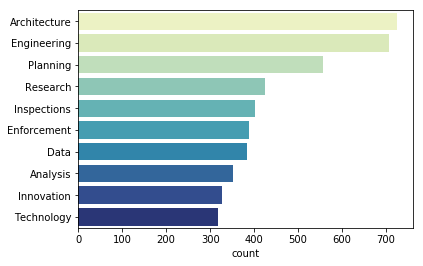

In [75]:
popular_skills
sns.countplot(y=key_skills, order=popular_skills.index, palette='YlGnBu')

### 5.2 Top 10 job categories with the highest salary

,job_category,average_salary
0,"Administration & Human Resources Finance, Acco...",218587.000000
1,"Engineering, Architecture, & Planning Maintena...",198518.000000
2,"Engineering, Architecture, & Planning Finance,...",196042.500000
3,"Health Policy, Research & Analysis Public Safe...",128694.500000
4,"Engineering, Architecture, & Planning Policy, ...",128247.500000
5,"Engineering, Architecture, & Planning Technolo...",128247.500000
6,Communications & Intergovernmental Affairs Eng...,125000.000000
7,"Administration & Human Resources Finance, Acco...",118287.000000
8,Constituent Services & Community Programs Comm...,116900.333333
9,Administration & Human Resources Constituent S...,104552.000000


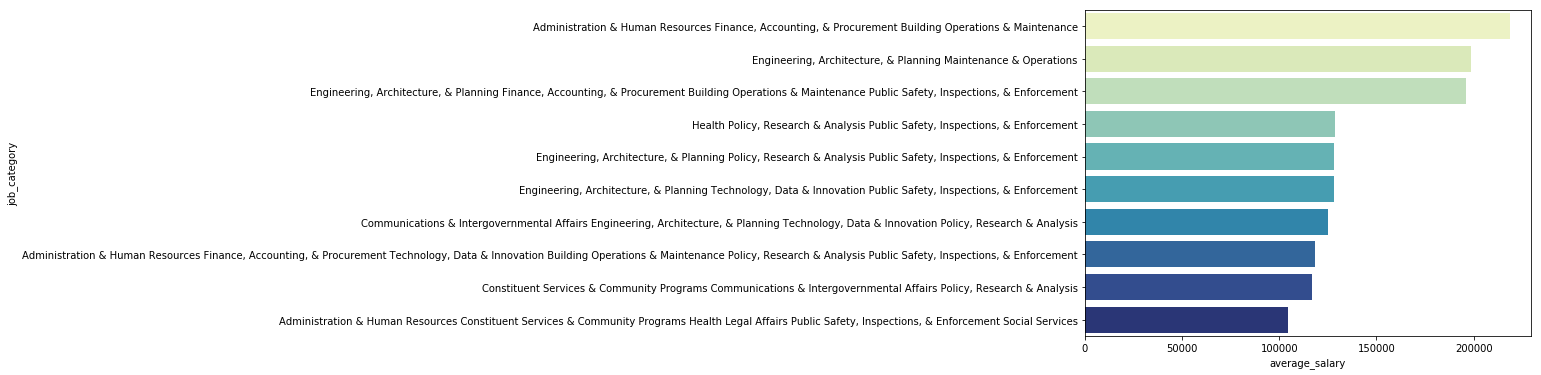

In [76]:
jobs_with_highest_salary = pd.DataFrame(df.groupby(['job_category'])['average_salary'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='job_category', x='average_salary', data=jobs_with_highest_salary, palette='YlGnBu')
jobs_with_highest_salary

### 5.3 Extract top 10 skills from the top 10 high paying job categories (listed above)
What we have done above (in 5.2) is that we identified the highest paying jobs based on the salary range. 
Now let us extact what skills are demanded by those job categories

Inspections                        6
Research                           5
Enforcement                        5
Architecture                       5
Engineering                        4
Data                               3
Analysis Public Safety             3
Administration                     3
Accounting                         3
Procurement Building Operations    2
dtype: int64

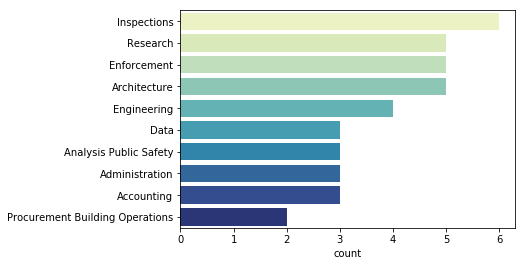

In [77]:
key_skills = []
jobs_with_highest_salary.job_category.dropna().apply(parse_categories)
key_skills = pd.Series(key_skills)
key_skills = key_skills[key_skills!='']
top_skills = key_skills.value_counts().iloc[:10]
sns.countplot(y=key_skills, order=top_skills.index, palette='YlGnBu')
top_skills

### 5.4 Why 'preferred_skills' has not been used to extract the top high paying skills

<div class="alert alert-block alert-danger">
<b>If we observe carefully, we are using job_category column to identify the skills while there is actually a column by name preferred_skills. Reason we are unable to use this preferred_skills column is because it is polluted with job description and expectation from the candidate including the soft skills. Following is a demonstration of what happens if we use preferred_skills column to extract the top skills<b>
<div/>

,preferred_skills,average_salary
0,The Deputy Commissioner position requires exce...,218587.0
1,The Deputy Commissioner position requires \te...,209585.0
2,Extensive experience in wastewater operations ...,198518.0
3,Experience in electrical troubleshooting and r...,183200.8
4,Required Skills \tIn depth knowledge of projec...,182500.0
5,Candidates are required to have both a valid N...,177652.8
6,A Masters Degree in accounting or related fiel...,177374.5
7,Valid holder of the CCISO Certified Chief Info...,169011.0
8,Clearly demonstrated experience trading money ...,167500.0
9,Expert knowledge of financial principles and c...,167500.0


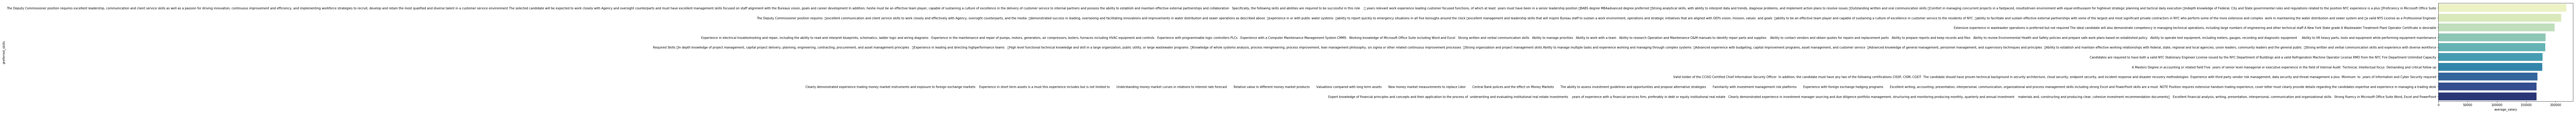

In [78]:
skills_with_highest_salary = pd.DataFrame(df.groupby(['preferred_skills'])['average_salary'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='preferred_skills', x='average_salary', data=skills_with_highest_salary, palette='YlGnBu')
skills_with_highest_salary

In [79]:
skills_in_demand = []
skills_with_highest_salary.preferred_skills.dropna().apply(parse_keywords, l=skills_in_demand)
skills_in_demand = pd.Series(skills_in_demand)
skills_in_demand.value_counts().iloc[:10]

experience       22
ability          17
management       15
skills           14
must              7
work              7
communication     7
knowledge         7
service           6
excellent         6
dtype: int64

<div class="alert alert-block alert-danger">
<b>If we see above, it is evident that the column preferred_skills can objectively be not used to extract the top skills<b>
<div/>

### Titles with highest paid salaries

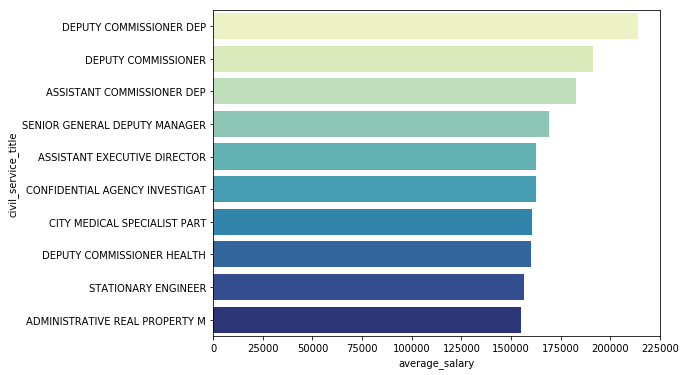

In [80]:
titles_with_highest_salary = pd.DataFrame(df.groupby(['civil_service_title'])['average_salary'].mean().nlargest(10)).reset_index()
plt.figure(figsize=(8,6))
sns.barplot(y='civil_service_title', x='average_salary', data=titles_with_highest_salary, palette='YlGnBu')

### Job description Wordcloud

In [81]:
def plot_wordcloud(text):
    wordcloud = WordCloud(background_color='white',
                     width=1024, height=720).generate(text)
    plt.clf()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

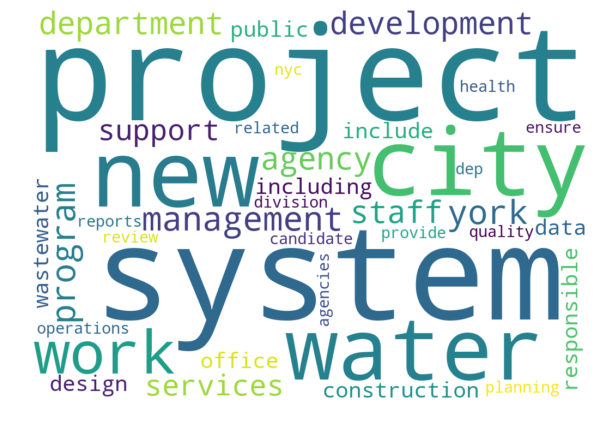

In [82]:
job_description_keywords = []
df.job_description.apply(parse_keywords, l=job_description_keywords)
plt.figure(figsize=(10, 8))
counter = Counter(job_description_keywords)
common = [x[0] for x in counter.most_common(40)]
plot_wordcloud(' '.join(common))

### Minimum Qualification Wordcloud

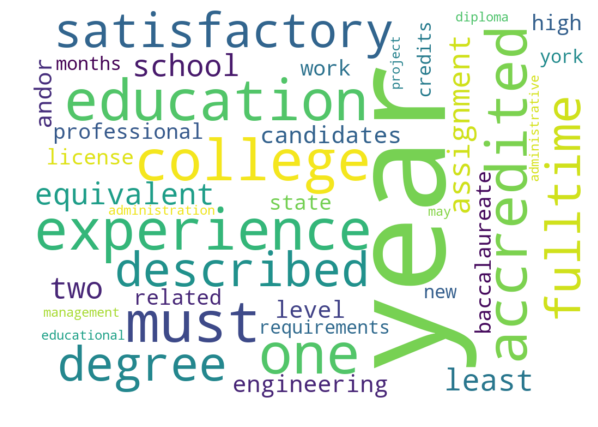

In [83]:
qualification_keywords = []
df.minimum_qual_requirements.dropna().apply(parse_keywords, l=qualification_keywords)
plt.figure(figsize=(10, 8))
counter = Counter(qualification_keywords)
common = [x[0] for x in counter.most_common(40)]
plot_wordcloud(' '.join(common))

### 5.5 Cluster job category with average salary

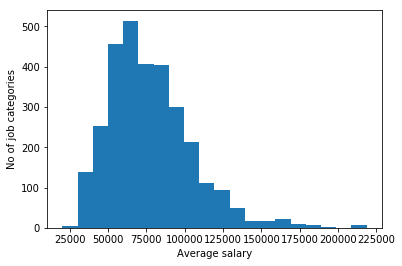

In [84]:
# Visualise the distribution of salary that will give us an idea on what salary ranges 
plt.hist(df['average_salary'], bins=20)
plt.xlabel('Average salary')
plt.ylabel('No of job categories')
plt.show()

**We can see that most of the job categories are in the range of 50000 to 100000 which the salary at 60000 having around 500 job categories.**

In [85]:
# List of job categories grouped by salary range
jobs_categories_grouped = pd.DataFrame(df.groupby(['job_category'])['average_salary'].mean()).reset_index()
plt.figure(figsize=(8,6))
jobs_categories_grouped

,job_category,average_salary
0,Administration & Human Resources,59143.605769
1,Administration & Human Resources Building Oper...,68013.700000
2,Administration & Human Resources Communication...,48970.447200
3,Administration & Human Resources Communication...,95000.000000
4,Administration & Human Resources Communication...,82141.000000
5,Administration & Human Resources Communication...,85591.500000
6,Administration & Human Resources Communication...,33941.000000
7,Administration & Human Resources Constituent S...,65530.375000
8,Administration & Human Resources Constituent S...,37382.400000
9,Administration & Human Resources Constituent S...,49576.500000


<Figure size 576x432 with 0 Axes>

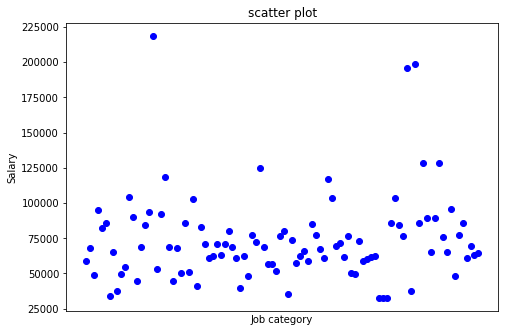

In [86]:
# Let us try to draw the scattoer plot between the average salary and the job cateogry. 
# Have hidden the job cateogries in the x axis as that will clutter the chart. 
# From the scatter plot, we can see that, the salaries for the different job categories are in the range of 50000 to 100000,
# with some outliers in the range of 220000. 
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(jobs_categories_grouped.job_category.head(100), jobs_categories_grouped.average_salary.head(100), color='b')
plt.xticks(rotation='vertical')
plt.xticks([])
ax.set_xlabel('Job category')
ax.set_ylabel('Salary')
ax.set_title('scatter plot')
plt.show()